# ARTIFICIAL NEURAL NETWORKS FINAL PROJECT  : DIGITAL CLASSIFICATION 
 
 -*- coding: utf-8 -*-
 """
 Created on Fri Nov  6 08:39:13 2020

 @author: **Mamadi Fofana S20**
 """
 
 
# **I. Introduction**

 In this competition we are challenged with a digits classification task.
 The images are similar to MNIST, however they contain the background noise.

 This Optical Character Recognition (OCR) problem will be implemented  using  Sequential Convolutional Neural Network (CNN). 
A convolutional neural network (CNN, or ConvNet or shift invariant or space invariant) is a class of deep network,
composed of one or more convolutional layers with fully connected layers (matching those in typical ANNs) on top.
It uses tied weights and pooling layers. In particular, max-pooling.it is most commonly applied to analyzing visual imagery
We will build it using keras API (Tensorflow backend) for its simplicity.     

Since deep learning technology is resource intensive,
we will implement our solution in the Google Colab environment which offers the advantage
of being able to use the GPU capabilities and thus accelerate the execution.

We will follow below steps:
    
 •	loading of the two datasets

 •	data wrangling (pre-processing data if necessary)

 •	exploration and visualization of data

 •  data splitting

 •	model building 

 •	model evaluation

 •	conclusion



 **Data Description**

 Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes(0 to 9).
 Dataset are flattened into a 784-elements array;each image is 28 pixels in height and 28 pixels in width,
 for a total of 784 pixels in total.
 Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, 
 with higher numbers meaning darker. This pixel-value is an float between 0 and 1.
    

**File descriptions**

  • train.csv - the training set

  • test.csv - the test set

  • sampleSubmission.csv - a sample submission file in the correct format
  


Import all required libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from numpy import argmax
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

np.random.seed(100)


# **II. Data Modeling**

**Loading the data**

Loading data from google drive and intial data exploration

Note that authentification is required in order to be able to connect to google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)


!cd "/content/drive/My Drive"

train = pd.read_csv('/content/drive/My Drive/train_data.csv', header=None)
test  = pd.read_csv('/content/drive/My Drive/test_data.csv', header=None)

print("--Train data exploration---")
print(train.shape)
print(train.head())
#train.info()
#train.describe()

print("\n --Test data exploration---")
print(test.shape)
print(test.head())
#print(test.info())
#print(test.describe())

Mounted at /content/drive/
--Train data exploration---
(12000, 785)
        0         1         2         3    ...       781       782       783  784
0  0.713940  0.950166  0.082491  0.473774  ...  0.497715  0.556270  0.698295  5.0
1  0.207442  0.159942  0.052641  0.051342  ...  0.494685  0.203191  0.391003  7.0
2  0.325839  0.056225  0.160836  0.759836  ...  0.407788  0.627825  0.673938  7.0
3  0.456670  0.540038  0.424184  0.660162  ...  0.893934  0.707141  0.606010  1.0
4  0.364102  0.175911  0.483085  0.126983  ...  0.895201  0.796101  0.432795  8.0

[5 rows x 785 columns]

 --Test data exploration---
(50000, 784)
        0         1         2    ...       781       782       783
0  0.923635  0.845687  0.392889  ...  0.914436  0.208952  0.818082
1  0.007767  0.670740  0.951021  ...  0.680603  0.676337  0.950921
2  0.358045  0.464620  0.437333  ...  0.439076  0.304218  0.776752
3  0.529594  0.952398  0.106095  ...  0.000732  0.298122  0.661337
4  0.615061  0.910934  0.610735  ...  0

**Data wrangling**

After data loading, our first task  will be  to  split train data set  between independants variables  and label.
Then we will check eventual missing values in both training and test set

We will then  reshape images in 3 dimensions (height = 28px, width = 28px , canal = 1) since Keras require channel for a 2D images data.

 Our data are gray scaled so they use only one channel

 Finally, we will encode our label as discrete values according to CNN requirements 


We note a balanced distribution of labels in the training set  

Checking missing value in train set 

count       784
unique        1
top       False
freq        784
dtype: object


Checking missing value in test set 

count       784
unique        1
top       False
freq        784
dtype: object


we noticed that there are no missing  values in the training and test data set  

 train data are comprised between 0 and 783 

 test data are comprised between 0 and 783 

 We noticed that data are already standardized around zero mean and unit variance.; that will help in  execution 

Train data set new dimension is (12000, 28, 28, 1) 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


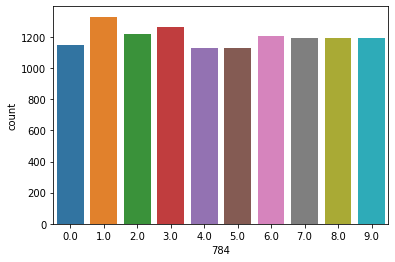

In [ ]:
# create the training label , using only 'label' column (last column)
Y_train = train[train.columns[-1]]

# create the training set, by dropping 'label' column
X_train = train.drop(train.columns[-1],axis = 1) 


#Check distribution of label category  in the training set 
g = sns.countplot(Y_train)

print("We note a balanced distribution of labels in the training set  \n")

# Check for missing value
print("Checking missing value in train set \n")
print(X_train.isnull().any().describe() )
print("\n")

print("Checking missing value in test set \n")
print(test.isnull().any().describe())
print("\n")

print("we noticed that there are no missing  values in the training and test data set  \n")

print(" train data are comprised between {} and {} \n".format (min(X_train),max(X_train) ))
print(" test data are comprised between {} and {} \n".format (min(test),max(test) ))

print(" We noticed that data are already standardized around zero mean and unit variance.; that will help in  execution \n")

#data reshaping
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# -1 in those 2 cases means values are inferred from the length of the array and remaining dimensions.
#in order that the new shape should be compatible with the original shape. 

print("Train data set new dimension is {} \n".format(X_train.shape))

# Encode labels to one hot vectors 
Y_train = to_categorical(Y_train, num_classes = 10)

**Data splitting**



In [ ]:
# Set the random seed
random_seed = 100

# We choose 80 % for the training set and 20% for the validation set
# To avoid unbalanced labels between train and validation set 
# We set option stratify to Y_train
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=100, stratify = Y_train)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=100)

#print(Y_train.shape)
#sns.countplot(argmax(Y_train[]))
#sns.countplot(Y_val)


 **Data Visualization**
 
  Let's try to visualize some samples images


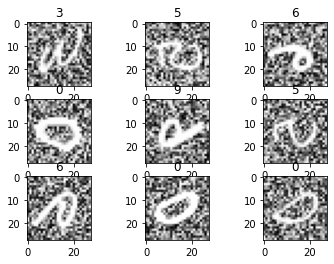

In [ ]:

X_train_g = X_train.reshape(X_train.shape[0], 28, 28)
for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train_g[i], cmap=plt.get_cmap('gray'))
    plt.title(argmax(Y_train[i]));

# **III. Model building**

In this recognition/classification of images, We will use Keras framework, one of the most common utilizations of TensorFlow.

TensorFlow is an open source library created for Python by the Google Brain team. TensorFlow compiles
many different algorithms and models together, enabling the user to implement deep neural networks 
for use in tasks like image recognition/classification and natural language processing.

Keras, it is a high-level API (application programming interface) that can use TensorFlow's functions
underneath (as well as other ML libraries like Theano).
Keras was designed with user-friendliness and modularity as its guiding principles.
In practical terms, Keras makes implementing the many powerful but often complex functions of TensorFlow 
as simple as possible, and it's configured to work with Python without any major modifications or configuration.

We will adopt sequential CNN model where  layers are added successively from the input.

The first layer of our model is a convolutional layer. It will take in the inputs and run convolutional filters on them.
We will play (tune) with filter values to select the best values

This process is typically done with more than one filter, which helps preserve the complexity of the image

The second layer in our model is the pooling (MaxPool2D) layer for  downsampling filter purpose.

The third layer is Dropout  to prevent overfitting where a proportion of nodes in the layer are randomly ignored

The fourth layer is Flatten layer used to convert the final feature maps into a one single 1D vector

The final layer is Dense layer which outputs distribution of probability of each class.


Activations function used will be Rectified Linear Unit (ReLU) and softmax

our CNN architechture present like this -> [[Conv2D->relu] * 3 -> MaxPool2D -> Dropout] * 2 -> Flatten -> Dense -> Dropout -> Out


In [ ]:
# Set the CNN model 

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.6))
model.add(Dense(10, activation = "softmax"))

**Optimizer settings**

After model building, we have to compile it.
In this step we will specify hyperparameters(numbers of epochs , batches)  and optimizer
The optimizer  will tune the weights in our network to minimise the loss

The metric function "accuracy" will be used to evaluate the performance of  our model

We will test several optimizer types:
  Stochastic Gradient Descent ('sgd') 
  RMSprop 

and compare the result to select the best one

We will also use an annealing method of the learning rate (LR) in order
to make the optimizer converge faster and closest to the global minimum of the loss function 

In [ ]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#optinizer = SGD(learning_rate=0.0001, momentum=0.0, nesterov=False, name="SGD")

# model compilation
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 60
batch_size = 60

**Regularization - Data augmentation** 

Data augmentation is useful to prevent overfitting issue.
We will try to artificially make some small transformtions in our handwritten digit dataset to reflect 
variations observed  in differents writting style . 

After testing, we have noticed some improvements with  data augmentation

In [ ]:

data_aug = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


data_aug.fit(X_train)

**Model evaluation**



In [ ]:
history = model.fit_generator(data_aug.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


Y_pred = model.predict(test)

# Revrse conversion predictions from one hot vectors to  classes  
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

pd.DataFrame(Y_pred_classes).to_csv("/content/drive/My Drive/pred.csv")

Epoch 1/60
160/160 - 3s - loss: 2.1093 - accuracy: 0.2134 - val_loss: 1.0319 - val_accuracy: 0.7412
Epoch 2/60
160/160 - 3s - loss: 1.1972 - accuracy: 0.5995 - val_loss: 0.4810 - val_accuracy: 0.8533
Epoch 3/60
160/160 - 3s - loss: 0.8045 - accuracy: 0.7389 - val_loss: 0.5422 - val_accuracy: 0.8300
Epoch 4/60
160/160 - 3s - loss: 0.6176 - accuracy: 0.8067 - val_loss: 0.3108 - val_accuracy: 0.9008
Epoch 5/60
160/160 - 3s - loss: 0.5163 - accuracy: 0.8381 - val_loss: 0.2976 - val_accuracy: 0.9054
Epoch 6/60
160/160 - 3s - loss: 0.4327 - accuracy: 0.8681 - val_loss: 0.2518 - val_accuracy: 0.9192
Epoch 7/60
160/160 - 3s - loss: 0.3944 - accuracy: 0.8791 - val_loss: 0.1784 - val_accuracy: 0.9429
Epoch 8/60
160/160 - 3s - loss: 0.3691 - accuracy: 0.8854 - val_loss: 0.1528 - val_accuracy: 0.9463
Epoch 9/60
160/160 - 3s - loss: 0.3432 - accuracy: 0.8968 - val_loss: 0.1627 - val_accuracy: 0.9479
Epoch 10/60
160/160 - 3s - loss: 0.3292 - accuracy: 0.9005 - val_loss: 0.1488 - val_accuracy: 0.9546

# **IV. Conclusion**

Our  model reaches almost 96% of accuracy on the validation dataset after several  epochs. The validation accuracy is greater than the training accuracy almost every time during the training. That means that our model dosen't not overfit the training set.

We  noticed plenty parameters ,  hyper-parameters and optimizers  which could be tuned in order to improve our model.it would be a good idea to play around with the model and see how changing those parameters affects its performance.

We have also noticed a huge difference in term of performance between GPU execution mode and no GPU execution mode

It could be more interesting to use cross validation in order to select automatically the best parameters and hyperparaneters.